In [87]:
import time as clock
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [88]:
#define amount of sample points
N = 2000

In [89]:
def thermal_conductivity_equation(t, x):
    return (2 + torch.exp(-4*(torch.pi**2)*t)*torch.sin(2*torch.pi*x) + torch.exp(-16*(torch.pi**2)*t)*torch.cos(4*torch.pi*x))

# function depicting a real graph and a predicted one
def check_current_situation(cur_model):
    x = torch.linspace(0, 1, 100)
    time = torch.zeros(100)
    real_temp = thermal_conductivity_equation(time, x)

    test_points = torch.stack((x, time), axis = -1)

    pinn_temp = cur_model(test_points)

    plt.plot(x.detach(), pinn_temp.detach())
    plt.plot(x, real_temp)

    plt.plot()
    plt.show()

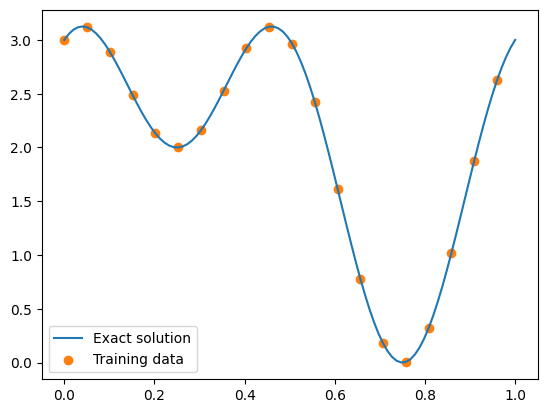

In [90]:
x = torch.linspace(0, 1, 100)
time = torch.zeros(100)
temp = thermal_conductivity_equation(time, x)

x_data = x[0:100:5]
temp_data = temp[0:100:5]


plt.plot(x, temp, label="Exact solution")
plt.scatter(x_data, temp_data, color="tab:orange", label="Training data")

plt.legend()
plt.show()

In [96]:
#define the class PINN
class PINN(nn.Module):
    def __init__(self, input_layer = 2, hidden_layer = 32, number_layers = 3, output_layer = 1):
        super().__init__()
        
        activation = nn.Tanh
        
        self.fcs = nn.Sequential(*
            [
                nn.Linear(input_layer, hidden_layer),
                activation()
            ]
        )
        
        self.fch = nn.Sequential(*
            [
                nn.Sequential(*
                    [
                        nn.Linear(hidden_layer, hidden_layer),
                        activation()
                    ]
                ) for _ in range(number_layers - 1)
            ]
        )
        
        self.fce = nn.Linear(hidden_layer, output_layer)
        
        
    def forward(self, x):
        x = F.gelu(self.fcs(x))
        x = F.gelu(self.fch(x))
        x = F.gelu(self.fce(x))
        
        return x

In [97]:
x_physics = torch.rand(N).view(-1, 1).requires_grad_(True)
time_physics = 0.05 * torch.rand(N).view(-1, 1).requires_grad_(True)

points_for_pinn_model = torch.stack((time_physics, x_physics), -1)
boundary_condition_points = torch.stack((torch.zeros(N), x_physics[:,0]), -1).unsqueeze(0)



torch.manual_seed(123)

pinn_model = PINN()
# optimizer = torch.optim.SGD(pinn_model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(pinn_model.parameters(),lr=1e-4)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5000, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.6)


epoch: 0, loss: 9.635723114013672, learning_rate: 0.0001


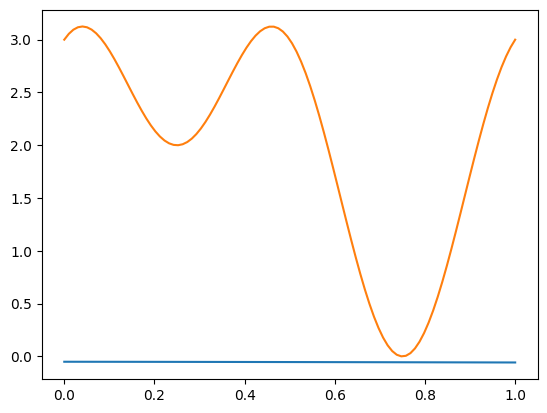

epoch: 250, loss: 5.523380279541016, learning_rate: 0.0001
epoch: 500, loss: 1.5457899570465088, learning_rate: 0.0001
epoch: 750, loss: 1.1731719970703125, learning_rate: 0.0001
epoch: 1000, loss: 1.1252824068069458, learning_rate: 0.0001


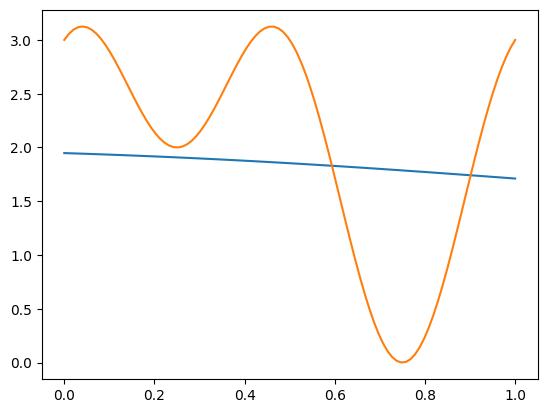

epoch: 1250, loss: 1.1047741174697876, learning_rate: 0.0001
epoch: 1500, loss: 1.0794739723205566, learning_rate: 0.0001
epoch: 1750, loss: 1.0439424514770508, learning_rate: 0.0001
epoch: 2000, loss: 0.9957682490348816, learning_rate: 0.0001


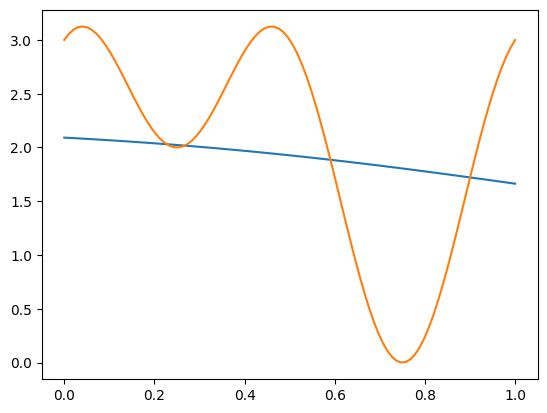

epoch: 2250, loss: 0.9492132067680359, learning_rate: 0.0001
epoch: 2500, loss: 0.9133878350257874, learning_rate: 0.0001
epoch: 2750, loss: 0.8823682069778442, learning_rate: 0.0001
epoch: 3000, loss: 0.8587738871574402, learning_rate: 0.0001


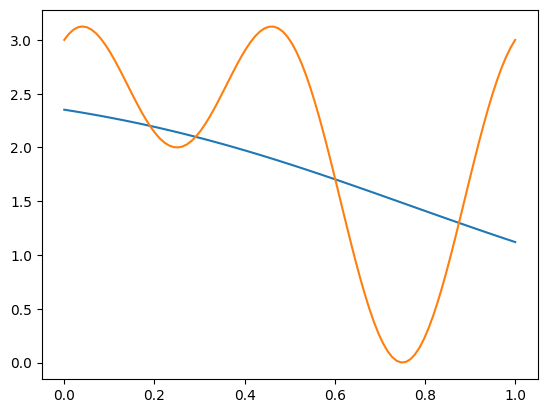

epoch: 3250, loss: 0.8423036336898804, learning_rate: 0.0001
epoch: 3500, loss: 0.8321532011032104, learning_rate: 0.0001
epoch: 3750, loss: 0.8264078497886658, learning_rate: 0.0001
epoch: 4000, loss: 0.822344958782196, learning_rate: 0.0001


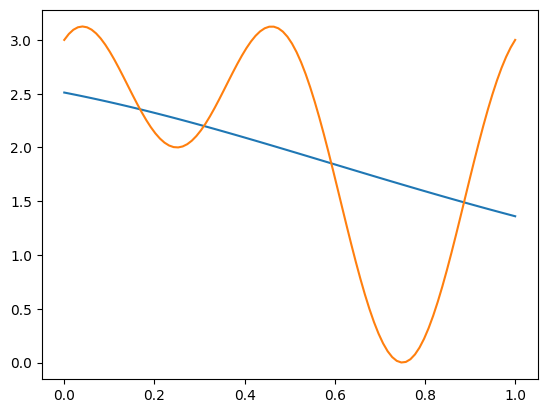

epoch: 4250, loss: 0.8186206817626953, learning_rate: 0.0001
epoch: 4500, loss: 0.8149384260177612, learning_rate: 0.0001
epoch: 4750, loss: 0.8112537860870361, learning_rate: 0.0001
epoch: 5000, loss: 0.8075570464134216, learning_rate: 0.0001


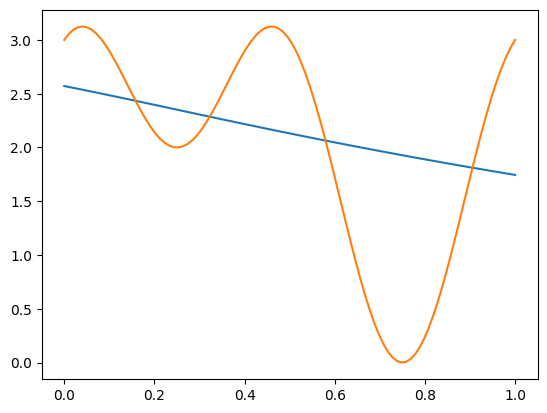

epoch: 5250, loss: 0.8038557171821594, learning_rate: 0.0001
epoch: 5500, loss: 0.8001815676689148, learning_rate: 0.0001
epoch: 5750, loss: 0.7965945601463318, learning_rate: 0.0001
epoch: 6000, loss: 0.7931764125823975, learning_rate: 0.0001


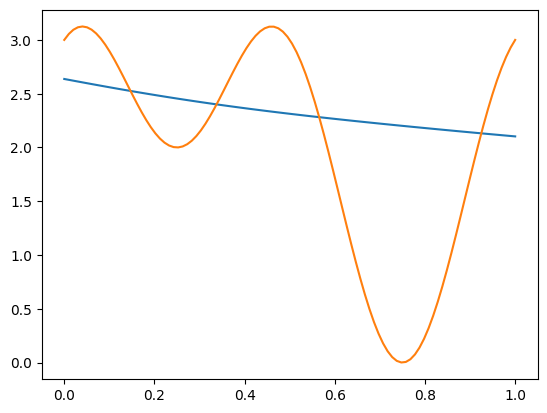

epoch: 6250, loss: 0.7900100946426392, learning_rate: 0.0001
epoch: 6500, loss: 0.7871413826942444, learning_rate: 0.0001
epoch: 6750, loss: 0.7845404148101807, learning_rate: 0.0001
epoch: 7000, loss: 0.7821058034896851, learning_rate: 0.0001


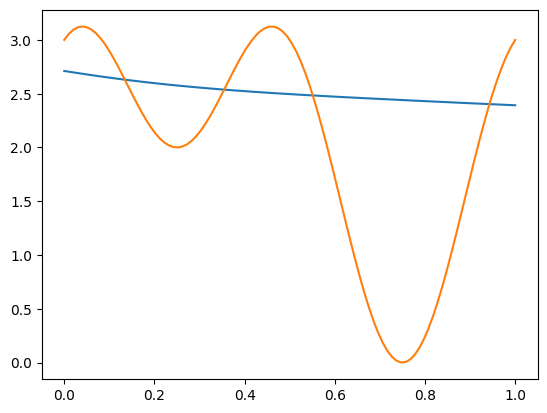

epoch: 7250, loss: 0.7797374129295349, learning_rate: 0.0001
epoch: 7500, loss: 0.7773886919021606, learning_rate: 0.0001
epoch: 7750, loss: 0.7750247716903687, learning_rate: 0.0001
epoch: 8000, loss: 0.7725983262062073, learning_rate: 0.0001


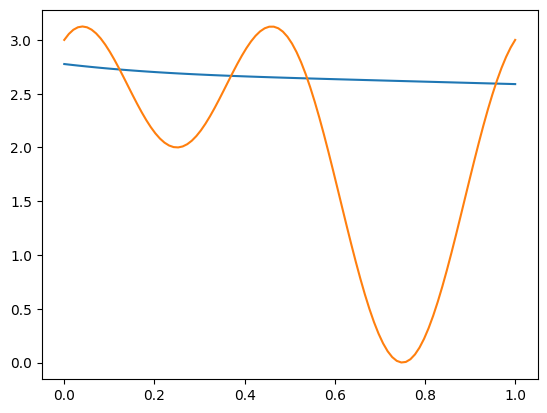

epoch: 8250, loss: 0.7699833512306213, learning_rate: 0.0001
epoch: 8500, loss: 0.7668265700340271, learning_rate: 0.0001
epoch: 8750, loss: 0.7621105909347534, learning_rate: 0.0001
epoch: 9000, loss: 0.7581620812416077, learning_rate: 0.0001


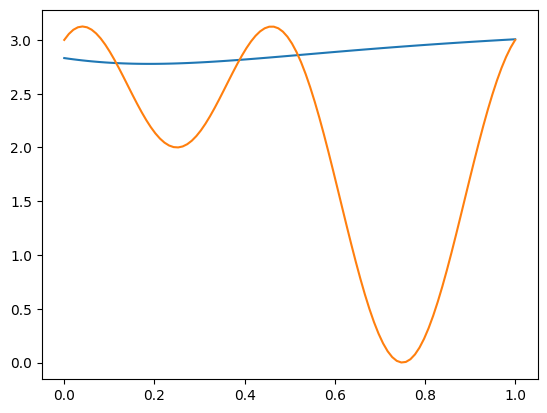

epoch: 9250, loss: 0.7552149891853333, learning_rate: 0.0001
epoch: 9500, loss: 0.7521554231643677, learning_rate: 0.0001
epoch: 9750, loss: 0.7487800717353821, learning_rate: 0.0001
epoch: 10000, loss: 0.7448049783706665, learning_rate: 0.0001


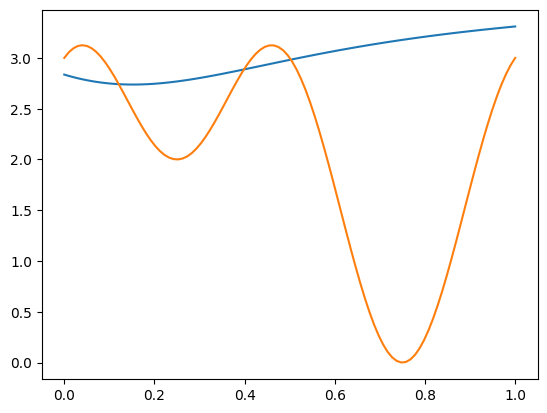

epoch: 10250, loss: 0.7400532364845276, learning_rate: 0.0001
epoch: 10500, loss: 0.7347140908241272, learning_rate: 0.0001
epoch: 10750, loss: 0.7289196252822876, learning_rate: 0.0001
epoch: 11000, loss: 0.7219564914703369, learning_rate: 0.0001


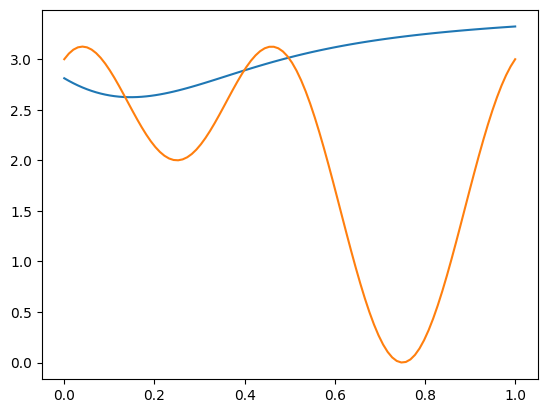

epoch: 11250, loss: 0.7125372290611267, learning_rate: 0.0001
epoch: 11500, loss: 0.6997486352920532, learning_rate: 0.0001
epoch: 11750, loss: 0.686643660068512, learning_rate: 0.0001
epoch: 12000, loss: 0.6749615669250488, learning_rate: 0.0001


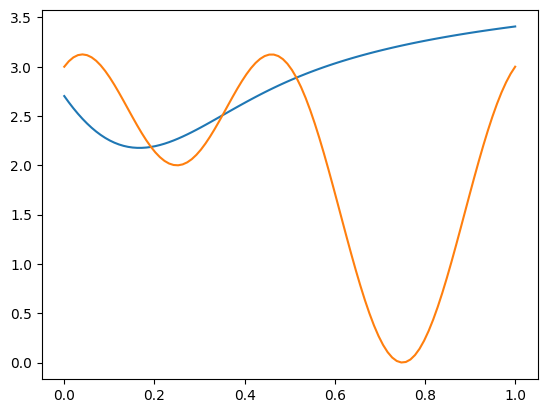

epoch: 12250, loss: 0.6644275784492493, learning_rate: 0.0001
epoch: 12500, loss: 0.6545957922935486, learning_rate: 0.0001
epoch: 12750, loss: 0.6456402540206909, learning_rate: 0.0001
epoch: 13000, loss: 0.6374301314353943, learning_rate: 0.0001


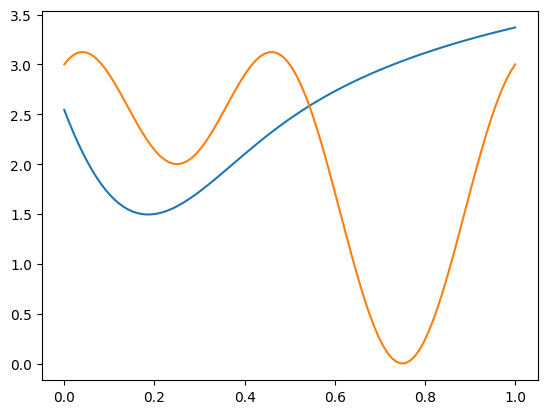

epoch: 13250, loss: 0.6300779581069946, learning_rate: 0.0001
epoch: 13500, loss: 0.6236197352409363, learning_rate: 0.0001
epoch: 13750, loss: 0.6181703209877014, learning_rate: 0.0001
epoch: 14000, loss: 0.6136048436164856, learning_rate: 0.0001


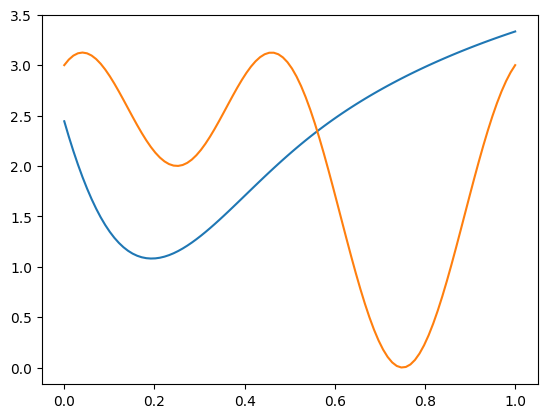

epoch: 14250, loss: 0.6098191738128662, learning_rate: 0.0001
epoch: 14500, loss: 0.6067938208580017, learning_rate: 0.0001
epoch: 14750, loss: 0.6042661666870117, learning_rate: 0.0001
epoch: 15000, loss: 0.6022244691848755, learning_rate: 0.0001


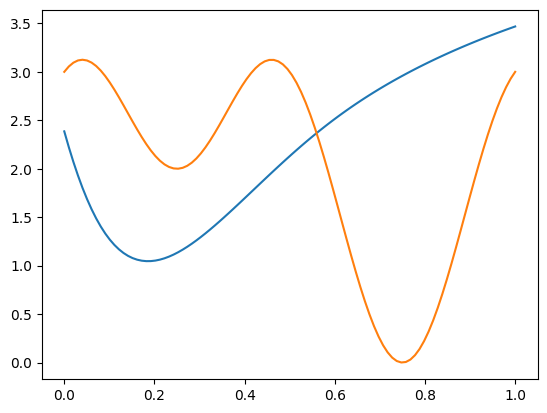

epoch: 15250, loss: 0.6001434326171875, learning_rate: 0.0001
epoch: 15500, loss: 0.5983500480651855, learning_rate: 0.0001
epoch: 15750, loss: 0.5965297222137451, learning_rate: 0.0001
epoch: 16000, loss: 0.5952795147895813, learning_rate: 0.0001


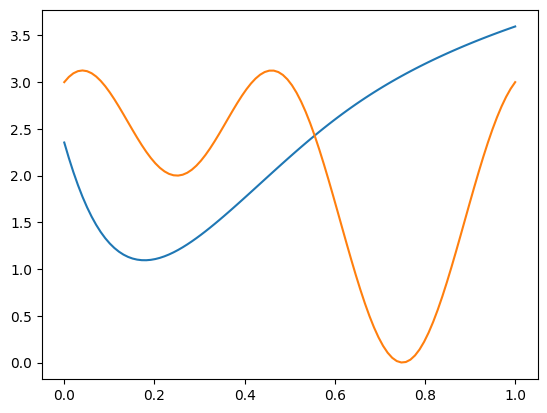

epoch: 16250, loss: 0.5930301547050476, learning_rate: 0.0001
epoch: 16500, loss: 0.5913867354393005, learning_rate: 0.0001
epoch: 16750, loss: 0.589796781539917, learning_rate: 0.0001
epoch: 17000, loss: 0.5881830453872681, learning_rate: 0.0001


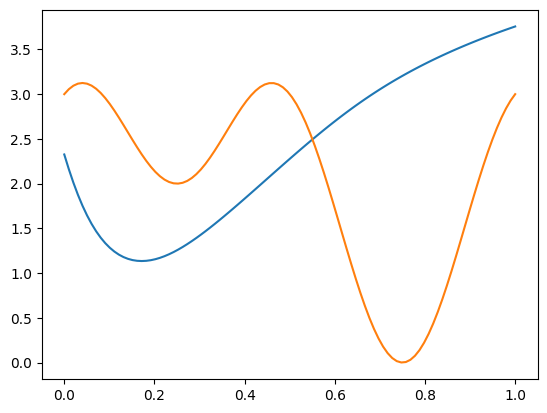

epoch: 17250, loss: 0.5865833163261414, learning_rate: 0.0001
epoch: 17500, loss: 0.5849339962005615, learning_rate: 0.0001
epoch: 17750, loss: 0.5832343101501465, learning_rate: 0.0001
epoch: 18000, loss: 0.5814664363861084, learning_rate: 0.0001


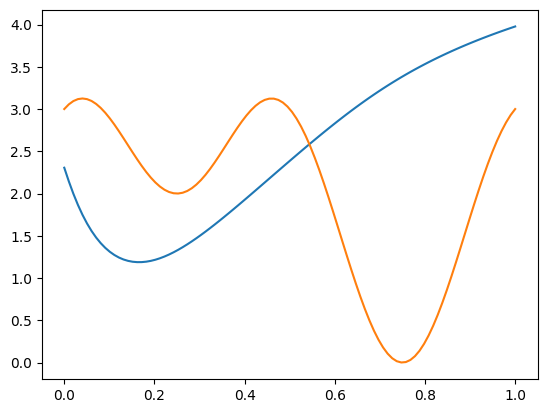

epoch: 18250, loss: 0.5798253417015076, learning_rate: 0.0001
epoch: 18500, loss: 0.5777562856674194, learning_rate: 0.0001
epoch: 18750, loss: 0.575907289981842, learning_rate: 0.0001
epoch: 19000, loss: 0.5740021467208862, learning_rate: 0.0001


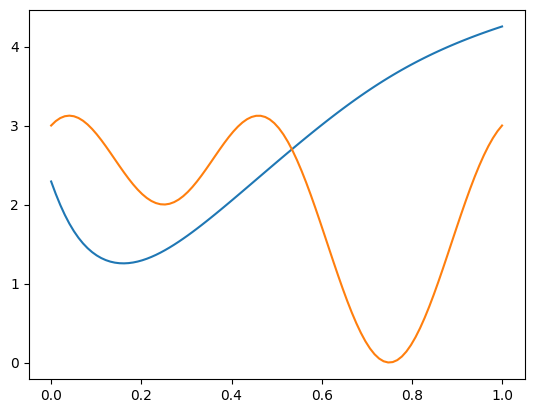

epoch: 19250, loss: 0.5721794962882996, learning_rate: 0.0001
epoch: 19500, loss: 0.5704641342163086, learning_rate: 0.0001
epoch: 19750, loss: 0.5688728094100952, learning_rate: 0.0001


In [ ]:
epochs = 20000

prev_loss = 0
for cur_epoch in range(epochs):
    optimizer.zero_grad()
    
    boundary_condition_temp = pinn_model(boundary_condition_points)
    
    # compute the "data loss"
    loss1 = torch.mean((thermal_conductivity_equation(time_physics, x_physics) - boundary_condition_temp)**2)
    loss2 = torch.mean((thermal_conductivity_equation(torch.zeros_like(x_physics), x_physics) - boundary_condition_temp)**2)
    
    network_temp = pinn_model(points_for_pinn_model)
    
    dt = torch.autograd.grad(network_temp, time_physics, torch.ones_like(network_temp), create_graph=True)[0]

    # computes dy/dx
    dx = torch.autograd.grad(network_temp, x_physics, torch.ones_like(network_temp), create_graph=True)[0]
    
    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]
    
    # compute the "physics loss"
    loss3 = torch.mean((dt - dx2)**2)
    
    
    loss = loss1 + loss2 + loss3
    loss.backward(retain_graph=True)
    
    """
    custom scheduler
    """
    
#     if prev_loss == 0:
#         prev_loss = loss

#     if cur_epoch != 0 and cur_epoch % 10 == 0:
#         if prev_loss == loss:
#             optimizer.param_groups[0]['lr'] = 0.9
#         elif abs(prev_loss-loss) < 0.1:
#             optimizer.param_groups[0]['lr'] *= 1.5
#         else:
#             optimizer.param_groups[0]['lr'] = 0.1
#         optimizer.param_groups[0]['lr'] = min(optimizer.param_groups[0]['lr'], 0.5)
#         prev_loss = loss
        
    
    optimizer.step()
#     scheduler.step(loss)
    
    if cur_epoch % 250 == 0:
        print(f'epoch: {cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
    if cur_epoch % 1000 == 0:
        check_current_situation(pinn_model)
        
    

print(f'epoch: {cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
check_current_situation(pinn_model)    
    